Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [1]:
# Import packages
import os
import json
import requests
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/06Abdulrazaq')

In [4]:
# Import module
import exercise06

# Request current data from the API

In [5]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [6]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,is_disabled,lon,is_reserved,fusion_lat,type,name,rental_uris,fusion_lon,lat,bike_id
0,0,-77.034474,0,0.0,electric_bike,559-904,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,38.901191,b2ef4237949e80cdab4c1efe4a0260d4
1,0,-77.012145,0,0.0,electric_bike,320-065,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,38.879585,6594540b619a114ab8a6aa366eb23228
2,0,-76.998311,0,0.0,electric_bike,203-204,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,38.930052,86f0893593a685f717f1fdaf3a9648ba
3,0,-77.075841,0,0.0,electric_bike,570-760,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,38.887650,b71ba3a8ab7d2841eecd5b8b90b36e93
4,0,-77.099555,0,0.0,electric_bike,201-455,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,38.848235,2b0c0a88570aaa356655331222c811f9


# Load JSON data saved in a file

In [7]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-04_00-03-33.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [8]:
# see how the data are stored
type(data)

dict

In [9]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [10]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [11]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887467,electric_bike,0,924ef5618d1895c18b3531eca0402589,320-065,-77.025758
1,0,0.0,0.0,38.955410,electric_bike,0,23ce8a3b16d45dbeee90f897be63b4fa,570-760,-76.940083
2,0,0.0,0.0,38.881684,electric_bike,0,4b2fca27531cbb5cf1257326d99ffbf3,268-224,-77.027271
3,0,0.0,0.0,38.907798,electric_bike,0,45304f2184b2c6b755fec5ec49a87ece,137-726,-77.071616
4,0,0.0,0.0,38.898284,electric_bike,0,40b192e859ac0ef541df7fabb2f3ddf7,329-768,-77.046887


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [12]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df.head()

,fusion_lon,type,lon,is_disabled,name,lat,is_reserved,fusion_lat,bike_id,timestamp
0,0.0,electric_bike,-77.025775,0,320-065,38.887404,0,0.0,0b3237e7e8848db7f9383addd00ed9ca,2024-03-04 15:41:43-05:00
1,0.0,electric_bike,-77.047399,0,228-812,38.899665,0,0.0,db5aceaf49e5d8fcd07b0b74502b7cdf,2024-03-04 15:41:43-05:00
2,0.0,electric_bike,-76.940174,0,570-760,38.955434,0,0.0,2a1229d75fd72321efe13ec982bf2836,2024-03-04 15:41:43-05:00
3,0.0,electric_bike,-77.046909,0,329-768,38.898296,0,0.0,95ef037837794ab124c3f09abcde038d,2024-03-04 15:41:43-05:00
4,0.0,electric_bike,-77.147707,0,201-455,38.863879,0,0.0,4c4e6597ded8352008738817ae519b62,2024-03-04 15:41:43-05:00


This is where you take over. Can you use this dataframe to answer the question(s) above?

In [13]:
#create table to store aggregated data - counting upon the hour component of the timestamp where it exists or create new dictionaary entry with hour as key
#group by hour
def get_aggregate_num_of_bikes_per_hour(table):
    new_table = table['bike_id'].groupby(table['timestamp'].dt.hour).agg('count')
    new_table.head()
    return new_table

In [14]:
#calling the function from the module
#df['Total # of Bikes'] = df['bike_id']
#new_table = df['bike_id'].groupby(df['timestamp'].dt.hour).agg('count')
#new_table.head()
df = exercise06.get_aggregate_num_of_bikes_per_hour(df)

df.head()

timestamp
0    11134
1    11147
2    11182
3    11236
4    11216
Name: bike_id, dtype: int64

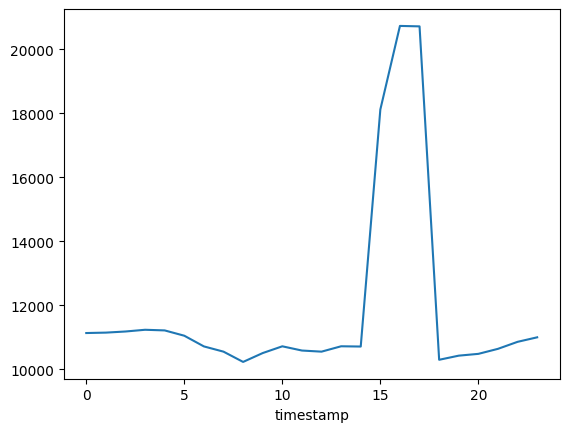

In [24]:
#plot  the datafram
exercise06.plot_graph(df)

In [16]:
#bikes available
most_hour, most_bikes = exercise06.get_most_available_hour(df) #assign result of function to two variables most hour, most bike respectively
least_hour, least_bikes = exercise06.get_least_available_hour(df)  #assign result of function to two variables least hour, least bike respectively
print(f"The hour with the most available bikes is {most_hour} with {most_bikes} bikes.")
print(f"The hour with the least available bikes is {least_hour} with {least_bikes} bikes.")

The hour with the most available bikes is 16 with 20734 bikes.
The hour with the least available bikes is 8 with 10231 bikes.


In [22]:
# Estimate current bike usage
current_usage_estimate = exercise06.estimate_current_usage()
if current_usage_estimate is not None:
    print(f"Estimated bikes currently in use: {current_usage_estimate}")


Estimated bikes currently in use: 0
